In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Input (temp, rainfall, humidity)
inputs = np.array(
    [[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58],
     [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]],
    dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119],
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119],
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

In [3]:
mu = np.mean(inputs, 0)
sigma = np.std(inputs, 0)
inputs = (inputs-mu)/sigma

In [4]:
# Weights and biases
W = np.random.rand(2, 3)
B = np.random.rand(2)

In [5]:
# Define the model
def model(x,w=W, b=B):
    return x @ w.T + b

In [6]:
preds = model(inputs)
preds

array([[-1.60629967, -1.4148232 ],
       [ 1.63189841,  2.09737628],
       [ 1.90787295,  2.56197703],
       [-0.77948313, -0.07188826],
       [ 0.89691607,  0.91033619],
       [-1.60629967, -1.4148232 ],
       [ 1.63189841,  2.09737628],
       [ 1.90787295,  2.56197703],
       [-0.77948313, -0.07188826],
       [ 0.89691607,  0.91033619],
       [-1.60629967, -1.4148232 ],
       [ 1.63189841,  2.09737628],
       [ 1.90787295,  2.56197703],
       [-0.77948313, -0.07188826],
       [ 0.89691607,  0.91033619]])

In [7]:
loss = mean_squared_error(preds, targets)
loss

8148.766951521912

In [8]:
def gradient_descent(X, Y, W, B, learning_rate, n_iters):
    JTheta = np.zeros((n_iters, 1))
    for i in range(n_iters):
        h = model(X, W, B)
        diff = h - Y
        delta = (learning_rate / Y.size) * (X.T @ diff)
        W = W - delta.T
        delta = (learning_rate / Y.size) * (np.ones([1, 15]) @ diff)
        B = B - delta
        JTheta[i] = mean_squared_error(h, Y)
    return JTheta, W, B

In [9]:
JTheta, W, B = gradient_descent(inputs, targets, W, B, 0.01, 500)
print(W)
print(B)

[[-4.71342893 21.45969479 12.46651973]
 [-3.90376495 20.87720275 13.99960568]]
[[70.0176835  84.56200032]]


In [10]:
preds = model(inputs, W, B)
preds

array([[ 49.96832535,  62.70559131],
       [ 78.70760402,  94.82646935],
       [106.77139173, 121.0040576 ],
       [ 15.70148053,  30.10986017],
       [ 98.93961574, 114.1640214 ],
       [ 49.96832535,  62.70559131],
       [ 78.70760402,  94.82646935],
       [106.77139173, 121.0040576 ],
       [ 15.70148053,  30.10986017],
       [ 98.93961574, 114.1640214 ],
       [ 49.96832535,  62.70559131],
       [ 78.70760402,  94.82646935],
       [106.77139173, 121.0040576 ],
       [ 15.70148053,  30.10986017],
       [ 98.93961574, 114.1640214 ]])

In [11]:
loss = mean_squared_error(preds, targets)
loss

55.34173354396335

In [12]:
def plot_loss(JTheta):
  plt.plot(JTheta, label='loss')
  plt.ylim([min(JTheta), max(JTheta)])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MSE]')
  plt.legend()
  plt.grid(True)

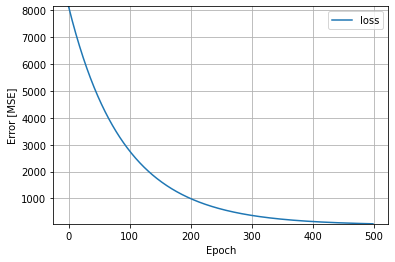

In [13]:
plot_loss(JTheta)